In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
import healpy as hp
import pysm 
from pysm.nominal import models
from pysm.common import convert_units
import camb
from camb import model, initialpower

In [167]:
nside = 1024; lmax = 2500; Nf = 2

In [9]:
# power_law in uK_RJ, not uK_CMB

f1 = convert_units('uK_RJ','uK_CMB', 100)
f2 = convert_units('K_CMB','uK_RJ', 100); f4 = convert_units('K_CMB','uK_RJ', 353)
f3 = convert_units('uK_RJ', 'uK_CMB', 100)

In [10]:
ali_ma = hp.read_map('/smc/jianyao/Ali_maps/ali_mask_wo_edge.fits', verbose=False)
def Mask(maps): 
    maps_ma = hp.ma(maps)
    maps_ma.mask = np.logical_not(ali_ma)
    return maps_ma

In [11]:
# I Q U
# uK_CMB
dust_95_psm = hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/thermaldust_map_95GHz.fits', field = None), nside_out = 1024)
dust_150_psm = hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/thermaldust_map_150GHz.fits', field = None), nside_out = 1024)

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [12]:
dust_test = hp.read_map('/smc/jianyao/Ali_maps/COM_SimMap_thermaldust-ffp10-skyinbands-353_2048_R3.00_full.fits', verbose=False, field = None, h = True)

In [65]:
# unit of CMB: uk_CMB; unit of noise: uK_CMB
cmb = hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/cmb_maps_camb.fits', verbose=False, field=None), nside_out = 1024)

# noise_150 = hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/noise_realizations_150.fits',field = None, verbose=False), nside_out = 1024)
# noise_150_ma = Mask(noise_150)

# # Q, U, spectra index
# # uK_RJ
# dust_real = hp.ud_grade(hp.read_map('/home/jianyao/Ali_maps/COM_CompMap_QU-thermaldust-commander_2048_R3.00_full.fits', verbose=False, field = None), nside_out = 1024)

#planck simulations
# I Q U
# K_CMB
dust_353 = f4*hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/COM_SimMap_thermaldust-ffp10-skyinbands-353_2048_R3.00_full.fits', verbose=False, field = None), nside_out = 1024)
dust_353_psm = f4*hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/thermaldust_map_detector_F353.fits', verbose = False, field = None), nside_out=1024)
# dust_100 = 1e6*hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/COM_SimMap_thermaldust-ffp10-skyinbands-100_2048_R3.00_full.fits', verbose=False, field = None), nside_out = 1024)

In [82]:
# uK_CMB, 95GHz; 150GHz
syn_95_psm = hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/synchrotron_map_95GHz.fits', verbose = False, field = None), nside_out = 1024)
syn_150_psm = hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/synchrotron_map_150GHz.fits', verbose = False, field = None), nside_out = 1024)

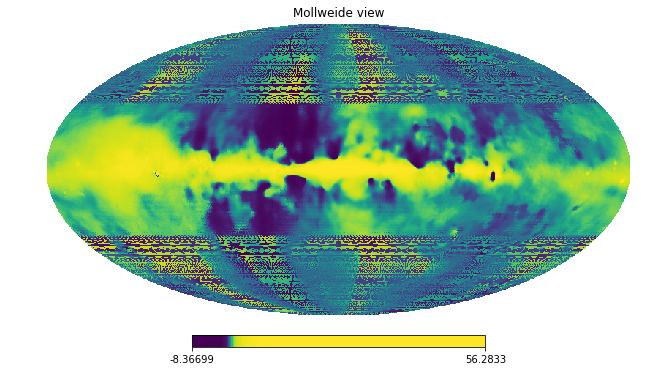

In [88]:
hp.mollview(syn95[1], norm = 'hist')

In [69]:
def Extra(nu):
    _dust_extra = np.zeros((3, 12*nside**2))
    _dust_beta = np.ones(12*nside**2)*1.54
    # dust_extra Q map
    _dust_extra[1] = f3*dust_353_psm[1]*(nu/353)**(_dust_beta)
    # dust_extra U map 
    _dust_extra[2] = f3*dust_353_psm[2]*(nu/353)**(_dust_beta)
    
    return _dust_extra

In [70]:
dust_extra_95 = Extra(95); dust_extra_150 = Extra(150)

In [653]:
L = lmax; Q = int(L/10.0); Ell = np.ones(Q)
def bin_l(cl):
    if len(cl.shape) > 2 :
        bin_averages = np.zeros((Q, cl.shape[1], cl.shape[1]))
    else:
        bin_averages = np.zeros(Q)
#     for l in range(L):
#         cl[l] = l*(l+1)/2/np.pi*(cl[l])    
    for q in range(Q):
        bin_averages[q] = (sum(cl[q*L//Q:((q+1)*L//Q)]/(L//Q)))
    return bin_averages

for i in range(0,int(Q)):
    Ell[i] = (2*i+1)*L//Q/2 

# Anisotropic and isotropic noise

In [71]:
n150cl = hp.anafast(noise_150, lmax = lmax)

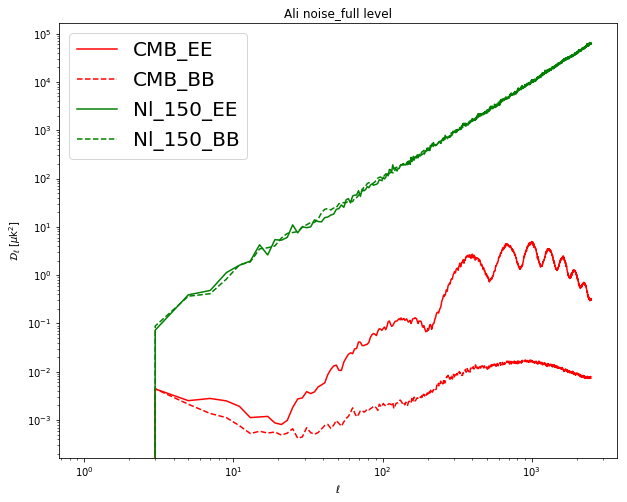

In [222]:
ell = np.arange(len(cmb_cl[0]))
plt.figure(figsize = (10,8))
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(cmb_cl[1]),'r', label = 'CMB_EE')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(cmb_cl[2]),'r--', label = 'CMB_BB')
# plt.loglog(ell, ell*(ell+1)/2/np.pi*cmb_cl[2],'r--', label = 'CMB_BB')

# plt.subplot(121)
# plt.plot(ell, ell*(ell+1)/2/np.pi*ncl1, 'b-x')
# # # plt.subplot(122)
# plt.plot(Ell, Ell*(Ell+1)/2/np.pi*bin_l(n2cl[1]), 'k-', label = 'Nl_95_EE')
# plt.plot(Ell, Ell*(Ell+1)/2/np.pi*bin_l(n2cl[2]), 'k--', label = 'Nl_95_BB')

plt.plot(Ell, Ell*(Ell+1)/2/np.pi*bin_l(nls[1]), 'g', label = 'Nl_150_EE')
plt.plot(Ell, Ell*(Ell+1)/2/np.pi*bin_l(nls[2]), 'g--', label = 'Nl_150_BB')

plt.xlabel('$\ell$'); 
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]')
plt.title('Ali noise_full level')
plt.legend(fontsize = 20)
plt.savefig('./ps_full_area_cmb_noise.pdf', format = 'pdf')

In [213]:
white_noise = hp.read_map('/smc/jianyao/Ali_maps/full_white_noise_realization_150.fits', field = None)
wn_ma = Mask(white_noise)

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [214]:
noise_150_full = hp.read_map('/smc/jianyao/Ali_maps/full_noise_realizations_150.fits',field = None, verbose=False)
noise_150_full_ma = Mask(noise_150_full)

In [215]:
#signal plus white noise
swn = cmb + white_noise
#signal plus anisotropic noise
sn = cmb + noise_150_full_ma

cmb_ma = Mask(cmb) 
sn_ma = Mask(sn) ; swn_ma = Mask(swn)

In [216]:
cmb_cls = hp.anafast(cmb_ma, lmax = lmax, nspec = 3)
sn_cls = hp.anafast(sn_ma, lmax = lmax, nspec = 3); 
nls = hp.anafast(noise_150_full_ma, lmax = lmax, nspec = 3)
swn_cls = hp.anafast(swn_ma, lmax = lmax, nspec = 3)
wnls = hp.anafast(wn_ma, lmax = lmax, nspec = 3)

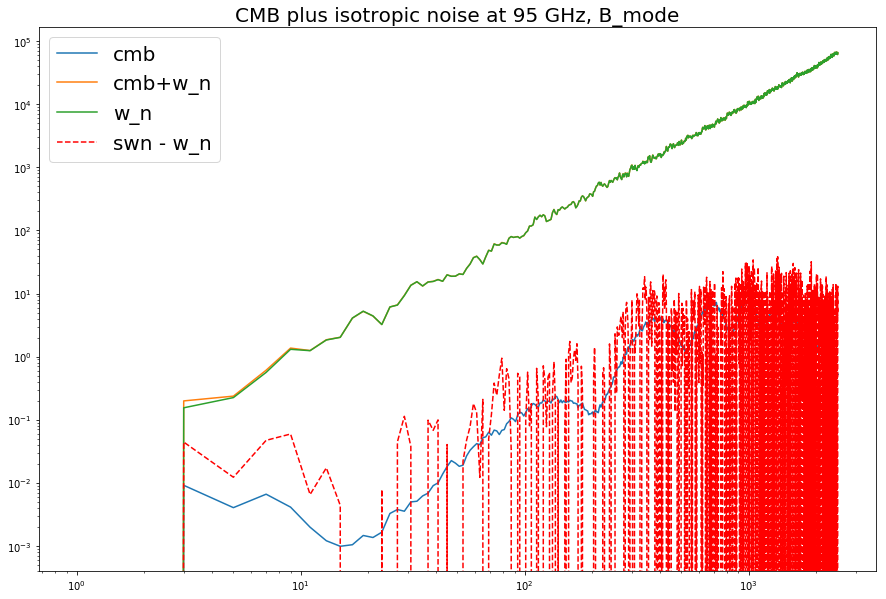

In [220]:
plt.figure(figsize = (15, 10)); S = 1
ell = np.arange(len(cmb_cls[0])); 
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(cmb_cls[S]), label = 'cmb')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(swn_cls[S]), label = 'cmb+w_n')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(wnls[S]), label = 'w_n')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l((swn_cls[S] - wnls[S])), 'r--',label = 'swn - w_n')
plt.title('CMB plus isotropic noise at 95 GHz, B_mode', fontsize = 20)
plt.legend(fontsize = 20)
# plt.savefig('./cmb_white_noise_95_GHz_B.pdf', format = 'pdf')

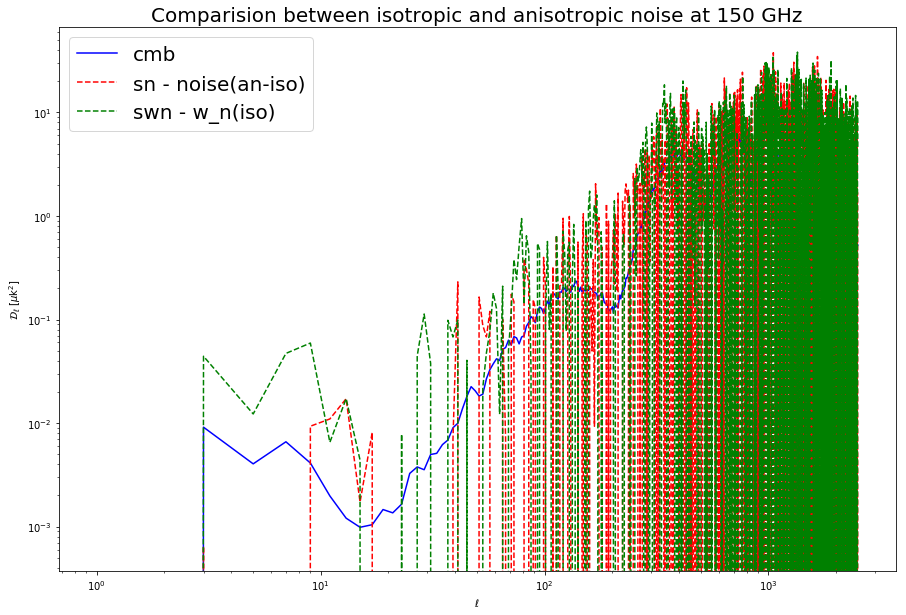

In [218]:
plt.figure(figsize = (15, 10)); S = 1
ell = np.arange(len(cmb_cls[0]))
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(cmb_cls[S]), 'b-',label = 'cmb')
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(sn_cls[S]), label = 'cmb+noise')
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(nls[S]), label = 'noise')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l((sn_cls[S] - nls[S])), 'r--',label = 'sn - noise(an-iso)')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l((swn_cls[S] - wnls[S])), 'g--',label = 'swn - w_n(iso)')
plt.xlabel('$\ell$'); 
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]')
plt.title('Comparision between isotropic and anisotropic noise at 150 GHz', fontsize = 20)
plt.legend(fontsize = 20)
# plt.savefig('./comparision_B_mode_150GHz.pdf', format = 'pdf')

In [138]:
# plt.figure(figsize = (15, 10));
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l((swn_cls[S] - wnls[S]) - (sn_cls[S] - nls[S])), 'r--',label = 'swn - w_n')
# plt.savefig('recovery_nosie_difference_95_Bmode.pdf', format = 'pdf')

# Dealing with foreground issue

In [24]:
noise_ali = hp.read_map('/smc/jianyao/Ali_maps/noise_realizations1.fits',field = None, verbose=False)

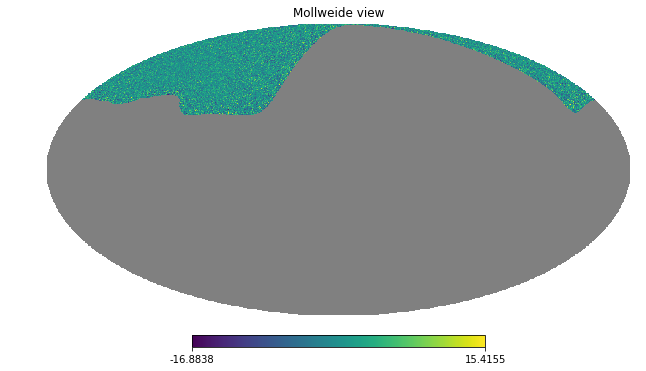

In [26]:
hp.mollview(noise_ali_ma[0])

In [25]:
noise_ali_ma = Mask(noise_ali)

In [33]:
# signal + foreground + noise
sfn = Mask(cmb + noise_ali + dust_95_psm )
sfn_cl = hp.anafast(sfn , lmax = lmax, nspec = 3)
 
#signal + foreground - extra + noise 
sn_exf = cmb + dust_95_psm - 2*dust_extra_95 + noise_ali
sn_exf_ma = Mask(sn_exf)
sn_exf_cl = hp.anafast(sn_exf_ma, lmax = lmax , nspec = 3)

In [28]:
nls = hp.anafast(noise_ali_ma, lmax = lmax, nspec = 3)

In [29]:
cmb_ma = Mask(cmb) 
cmb_cls = hp.anafast(cmb_ma, lmax = lmax, nspec = 3)

Text(0.5, 1.0, 'Dust')

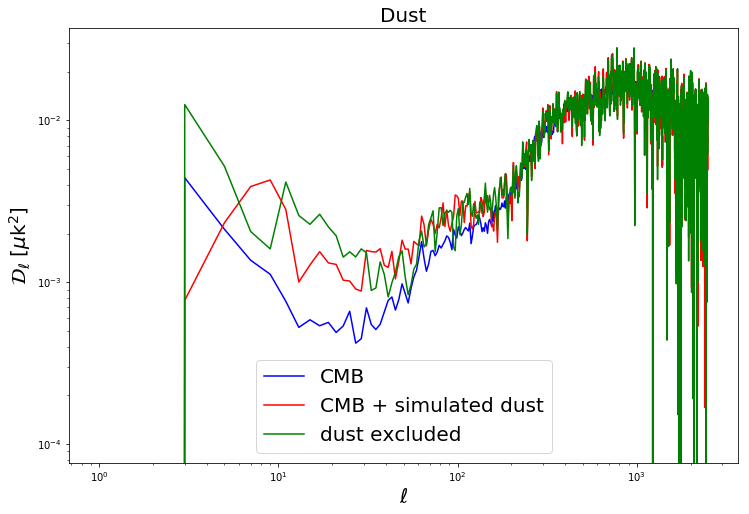

In [34]:
K = 2
ell = np.arange(len(cmb_cls[0])); #Ell = ell*(ell + 1)/2/np.pi
plt.figure(figsize = (12, 8))
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(cmb_cls[K]), 'b',label = 'CMB')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(sfn_cl[K] - nls[K]), 'r',label = 'CMB + simulated dust')

plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(sn_exf_cl[K] - nls[K]),'g', label = 'dust excluded')
plt.legend(fontsize = 20)

plt.xlabel('$\ell$', fontsize = 20); 
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]', fontsize = 20)
plt.title('Dust', fontsize = 20)
# plt.savefig('../results/noise_dust.png', format = 'png')

# Apply ILC method 

In [35]:
def Power_spectrum(maps,R, lmax):
    global cl
    ''' revised for upper-triangle of the matrix '''
    n_f = len(maps)
#     print(n_f)
    cl = np.ones((n_f*n_f, lmax +1)); Cl = np.zeros((lmax+1, n_f, n_f))
    k = 0
    for i in range(n_f):
        for j in range(n_f):
            
            if i >= j :
                cross_ps = hp.anafast(maps[i], maps[j], lmax = lmax, gal_cut=R)
            else:
                cross_ps = np.zeros((3, lmax+1)) ## TT, EE, BB
            cl[k] = cross_ps[2]  ## calculate the B_mode power spectrum 
            k += 1
#     print(cl.shape)
    for l in range(lmax+1):
        Cl[l, 0:n_f , 0:n_f] = cl[:,l].reshape(n_f, n_f)
        Cl[l] += Cl[l].T - np.diag(Cl[l].diagonal()) 
    return Cl

In [36]:
noise_95 = hp.read_map('/smc/jianyao/Ali_maps/noise_realizations1.fits', field = None)
noise_150 = hp.read_map('/smc/jianyao/Ali_maps/noise_realizations_150.fits', field = None)

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [780]:
frac = 1
# total power spectrum
total = np.zeros((2, 3, 12*nside**2))
total[0] = dust_95_psm + cmb + noise_95 - frac*dust_extra_95 # syn_95_
total[1] = dust_150_psm + cmb + noise_150 - frac*dust_extra_150 #
# total_ps = Power_spectrum(Mask(total), 0, lmax = lmax)

# # noise power spectrum
# Noise = np.zeros((2,3,12*nside**2))
# Noise[0] = noise_95;  Noise[1] = noise_150
# noise_ps = Power_spectrum(Mask(Noise), 0, lmax = lmax)

In [719]:
e = np.matrix(np.ones(2))
noise_bin = bin_l(noise_ps); noise_ilc = np.zeros(Q); total_bin = bin_l(total_ps)
cl_ilc = np.zeros(Q)
#calculate the weight
W = np.matrix(np.zeros((Q, 2)))
for l in range(Q):
    norm = e*np.linalg.pinv((total_bin[l]))*e.T
    W[l,:] = e*np.linalg.pinv((total_bin[l]))/norm   
    
for i in range(Q):
    noise_ilc[i] = W[i,:]*(noise_bin[i])*np.transpose(W[i,:])
    cl_ilc[i] = 1.0/(e*np.linalg.pinv((total_bin[i]))*e.T) - noise_ilc[i]

## ILC PS to maps

In [482]:
total_mask = Mask(total)

In [483]:
m_num = int((1 + 3*nside)*3*nside/2) # the number of alm of lmax=l for m >= 0; m = 0,1 for l = 1; m = 0,1,2 for l = 2.
alm_Q = np.zeros((Nf, m_num), dtype = 'complex128'); alm_U = np.zeros((Nf, m_num), dtype = 'complex128')
alm_Q[0] = hp.map2alm(total_mask[0][1]); alm_Q[1] = hp.map2alm(total_mask[1][1]); # 95GHz, 150GHz.
alm_U[1] = hp.map2alm(total_mask[0][2]); alm_U[1] = hp.map2alm(total_mask[1][2])

In [142]:
def m_l(lmax, l):
    ''' 
    Return the m of corresponding l.
    
    '''
    m_id = np.ones(l+1, dtype = np.int)
    for i in range(l + 1):
        m_id[i] = hp.sphtfunc.Alm.getidx(lmax, l , i)
    return (m_id)

In [484]:
alm_Q_clean = (np.zeros(m_num,dtype = 'complex128')); alm_U_clean = np.zeros(m_num, dtype = 'complex128')
for l in np.arange(lmax):
    alm_Q_clean[m_l(lmax, l)] = np.dot(np.array(W[l, :]),alm_Q[:,m_l(lmax, l)])[0] #np.dot(np.array(weight[l, :]),alm_Q[:,m_l(lmax, l)])[0]#
    alm_U_clean[m_l(lmax, l)] = np.dot(np.array(W[l, :]),alm_U[:,m_l(lmax, l)])[0]
alm_Q_clean[m_l(lmax, 0)] = 0; alm_Q_clean[m_l(lmax, 1)] = 0
alm_U_clean[m_l(lmax, 0)] = 0; alm_U_clean[m_l(lmax, 1)] = 0

In [485]:
Q_clean = hp.alm2map(alm_Q_clean, nside = nside); U_clean = hp.alm2map(alm_U_clean, nside = nside);
I_clean = np.zeros_like(Q_clean)
cmb_clean = np.row_stack((I_clean, Q_clean, U_clean))
alm_total = hp.map2alm(cmb_clean)
B_maps = hp.alm2map(alm_total[2], nside = nside, verbose = False)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


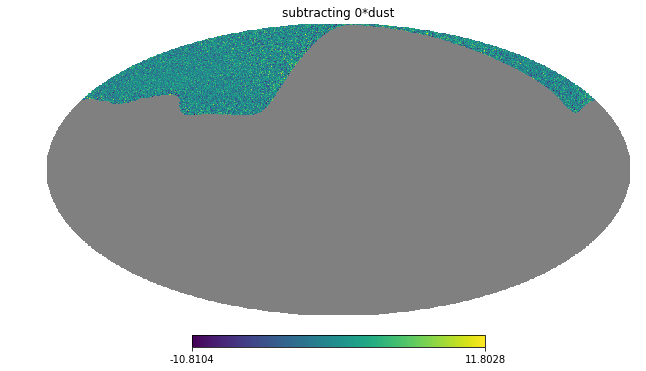

In [486]:
hp.mollview(Mask(B_maps), title = 'subtracting 0*dust')
plt.savefig('subtracting 0*dust.png', format = 'png')

In [464]:
alm_cmb = hp.map2alm(cmb)
b_cmb = hp.alm2map(alm_cmb[2], nside = nside, verbose = False)

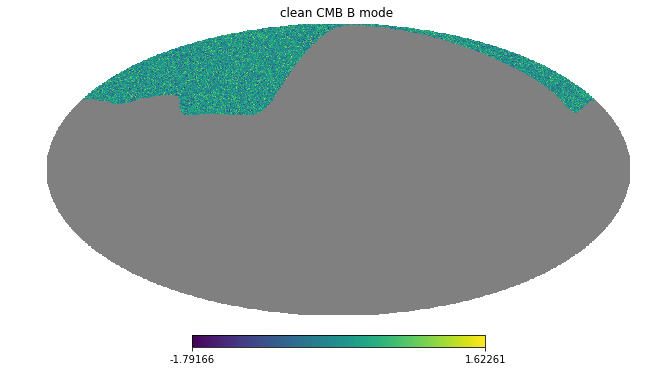

In [456]:
hp.mollview(Mask(b_cmb), title = 'clean CMB B mode ')
plt.savefig('clean_b_mode.png', format = 'png')

## ILC results plots

In [657]:
cmb_ma = Mask(cmb) 
cmb_cls = hp.anafast(cmb_ma, lmax = lmax, nspec = 3)

In [658]:
cls = bin_l(cmb_cls[2])

In [41]:
total_ps_95 = hp.anafast(Mask(total[0]), lmax = lmax, nspec = 3); nl_95 = hp.anafast(Mask(noise_95), lmax = lmax, nspec = 3)

In [42]:
cl_extra = bin_l(total_ps_95[2] - nl_95[2])

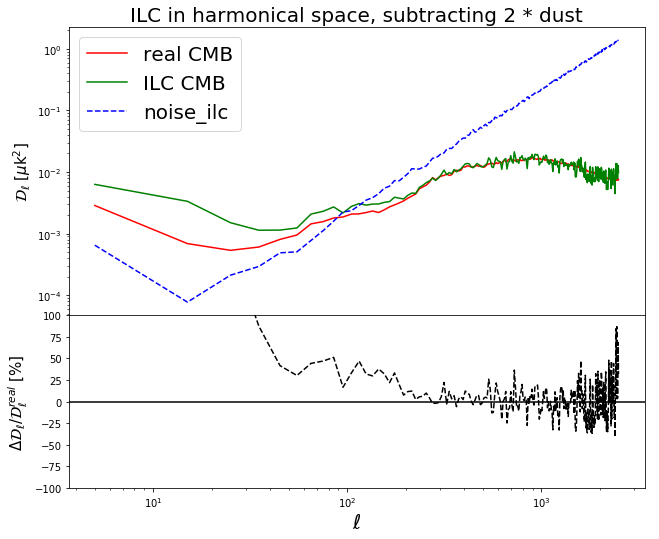

In [721]:
fig1 = plt.figure(1, figsize=(10,8))
plt.axis('off')
frame1=fig1.add_axes((.1,.4,.8,.5)) # x0, y0, width, height
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*cls, 'r-',label = 'real CMB')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*cl_ilc, 'g-', label = 'ILC CMB')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*noise_ilc, 'b--', label = 'noise_ilc')

# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*cl_extra, 'b-',label = 'extra CMB')

plt.xlabel('$\ell$', fontsize = 20); 
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]', fontsize = 15)
plt.legend(fontsize = 20)
plt.title('ILC in harmonical space, subtracting %s * dust'%frac, fontsize = 20)

frame2=fig1.add_axes((.1,.1,.8,.3))
plt.semilogx(Ell, (cl_ilc - cls)/cls*100, 'k--')
plt.axhline(0,color = 'k')
plt.ylabel(r'$\Delta \mathcal{D}_\ell$/$\mathcal{D}^{real}_{\ell} $ [%]', fontsize = 15);plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylim(-100, 100)
plt.savefig('/home/jianyao/Ali_maps/results/1106_ILC_dust_level_pixel_space/Ell_%s_dust.png'%frac, format = 'png')

## ILC in pixel space

In [772]:
index = np.arange(12*nside**2)
mask_index = index[ali_ma == 1]

In [781]:
total_mask = Mask(total)

total_Q = np.zeros((2, 12*nside**2)) ## two frequencies
total_Q[0][mask_index] = total_mask[0][1][mask_index] ; total_Q[1][mask_index]  = total_mask[1][1][mask_index] 

total_U = np.zeros((2, 12*nside**2)) ## two frequencies
total_U[0][mask_index] = total_mask[0][2][mask_index] ; total_U[1][mask_index]  = total_mask[1][2][mask_index] 

noise_Q = np.zeros((2, 12*nside**2)); noise_U= np.zeros((2, 12*nside**2))
noise_Q[0][mask_index] = noise_95[1][mask_index]; noise_Q[1][mask_index] = noise_150[1][mask_index]
noise_U[0][mask_index] = noise_95[2][mask_index]; noise_U[1][mask_index] = noise_150[2][mask_index]


In [782]:
Cov_Q = np.zeros((Nf, Nf)); w_Q = np.zeros(Nf)
Cov_U = np.zeros((Nf, Nf)); w_U = np.zeros(Nf)

for i in range(Nf):
    for j in range(Nf):
        Cov_Q[i, j] = np.dot(total_Q[i][mask_index] - np.mean(total_Q[i][mask_index]), total_Q[j][mask_index] - np.mean(total_Q[j][mask_index]))/1.0/len(mask_index)
        Cov_U[i, j] = np.dot(total_U[i][mask_index] - np.mean(total_U[i][mask_index]), total_U[j][mask_index] - np.mean(total_U[j][mask_index]))/1.0/len(mask_index)

Cov_Q_inv = np.linalg.pinv(Cov_Q)
Cov_U_inv = np.linalg.pinv(Cov_U)


for i in range(Nf):
    #This is wrong!!! 11.10.2019. We need to calculate the inverse matrix of the covarianve matrix..
#     w_Q[i] = np.sum(1.0/Cov_Q[i,:])/np.sum(1/Cov_Q) 
#     w_U[i] = np.sum(1.0/Cov_U[i,:])/np.sum(1/Cov_U)
    w_Q[i] = np.sum(Cov_Q_inv[i,:])/np.sum(Cov_Q_inv)
    w_U[i] = np.sum(Cov_U_inv[i,:])/np.sum(Cov_U_inv)



cmb_Q = np.dot(w_Q, total_Q)
cmb_U = np.dot(w_U, total_U)
noise_ilc_q = np.dot(w_Q, noise_Q); noise_ilc_u = np.dot(w_U, noise_U)

In [783]:
cmb_I = np.zeros_like(cmb_Q);
cmb_ILC_pix = np.row_stack((cmb_I, cmb_Q, cmb_U))

noise_I = np.zeros_like(noise_ilc_q)
noise_ilc_pix = np.row_stack((noise_I, noise_ilc_q, noise_ilc_u))

In [784]:
cls_ILC_pix = hp.anafast(cmb_ILC_pix, lmax = lmax, nspec = 3)
nl_ilc_pix = hp.anafast(noise_ilc_pix, lmax = lmax, nspec = 3)

In [785]:
cls_pix = bin_l(cls_ILC_pix[2])
nl_pix = bin_l(nl_ilc_pix[2])

(-100, 100)

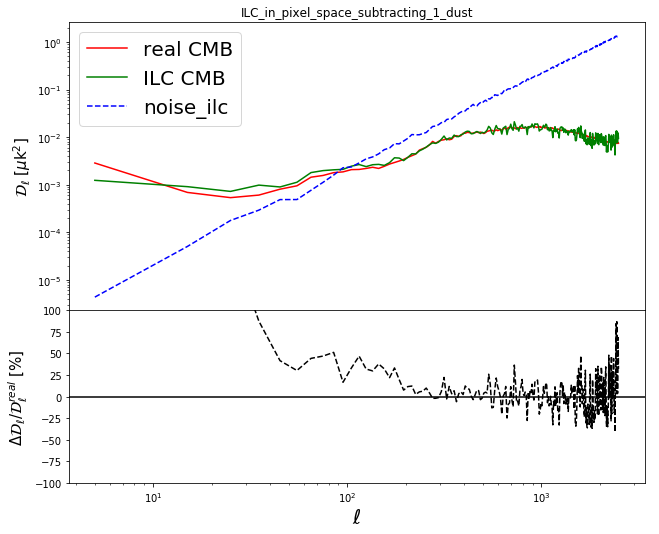

In [786]:
plt.figure(figsize = (10, 8))
ell = np.arange(len(cls_ILC_pix[2]))
# plt.loglog(ell, ell*(ell+1)*(cls_ILC_pix[2]- nl_ilc_pix[2])/2/np.pi , 'g-', label = 'cmb_ILC')
# plt.loglog(ell, ell*(ell+1)*(nl_ilc_pix[2])/2/np.pi, 'b-', label = 'noise')
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*cls, 'r-',label = 'real CMB')
# plt.xlabel('$\ell$', fontsize = 20); 
# plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]', fontsize = 20)
# plt.title('ILC_in_pixel_space_subtracting_%s_dust'%frac)
# plt.legend(fontsize = 20)
# # plt.savefig('ILC_pixel_space_0.5*dust.png', format = 'png')



fig1 = plt.figure(1, figsize=(10,8))
plt.axis('off')
frame1=fig1.add_axes((.1,.4,.8,.5)) # x0, y0, width, height
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*cls, 'r-',label = 'real CMB')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*(cls_pix - nl_pix), 'g-', label = 'ILC CMB')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*nl_pix, 'b--', label = 'noise_ilc')

# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*cl_extra, 'b-',label = 'extra CMB')

plt.xlabel('$\ell$', fontsize = 20); 
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]', fontsize = 15)
plt.legend(fontsize = 20)
plt.title('ILC_in_pixel_space_subtracting_%s_dust'%frac)
plt.legend(fontsize = 20)

frame2=fig1.add_axes((.1,.1,.8,.3))
plt.semilogx(Ell, (cl_ilc - cls)/cls*100, 'k--')
plt.axhline(0,color = 'k')
plt.ylabel(r'$\Delta \mathcal{D}_\ell$/$\mathcal{D}^{real}_{\ell} $ [%]', fontsize = 15);plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylim(-100, 100)
# plt.savefig('/home/jianyao/Ali_maps/results/1106_ILC_dust_level_pixel_space/Ell_%s_dust_pixel_ILC.png'%frac, format = 'png')

In [637]:
w_U

array([0.51099006, 0.48900994])

In [630]:
w_Q

array([0.54111001, 0.45888999])

In [631]:
w_U

array([0.52628997, 0.47371003])

In [546]:
Cov = np.zeros((Nf, Nf)); w_real = np.zeros(Nf)
for i in range(Nf):
    for j in range(Nf):
        Cov[i, j] = np.dot(total[i][0] - np.mean(total[i][0]), total[j][0] - np.mean(total[j][0]))/1.0/len(index)

In [547]:
for i in range(Nf):
    w_real[i] = np.sum(1.0/Cov[i,:])/np.sum(1/Cov)

In [549]:
total_I = np.row_stack((total[0][0], total[1][0]))
cmb_I = np.dot(w_real, total_I)

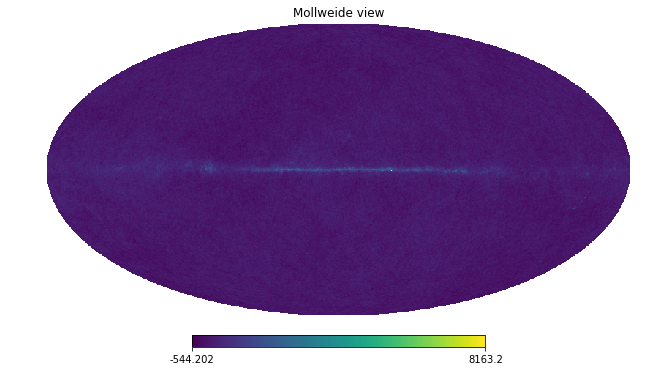

In [554]:
hp.mollview(total[0][0])

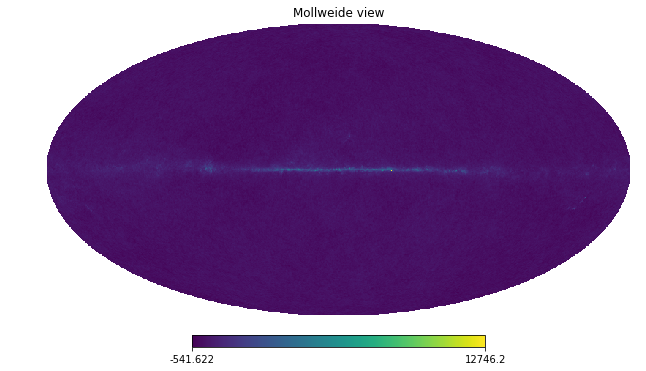

In [553]:
hp.mollview(cmb_I)

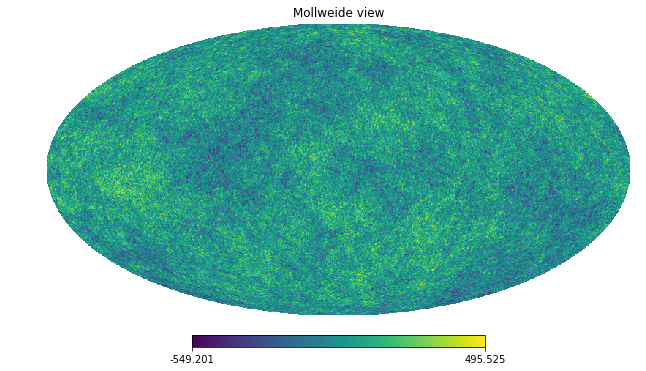

In [552]:
hp.mollview(cmb[0])

In [537]:
cmb_Q = np.dot(w_real, total_Q)

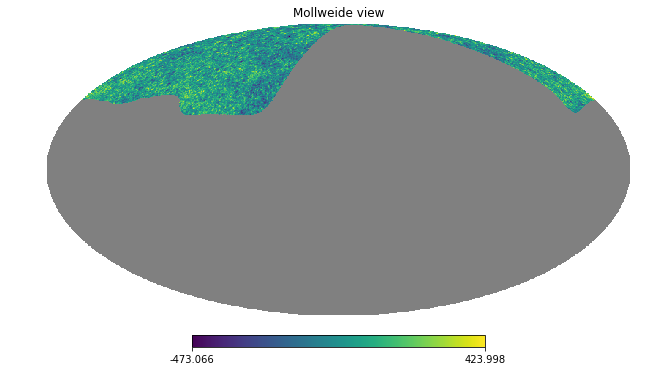

In [538]:
hp.mollview(Mask(total_Q[1]))

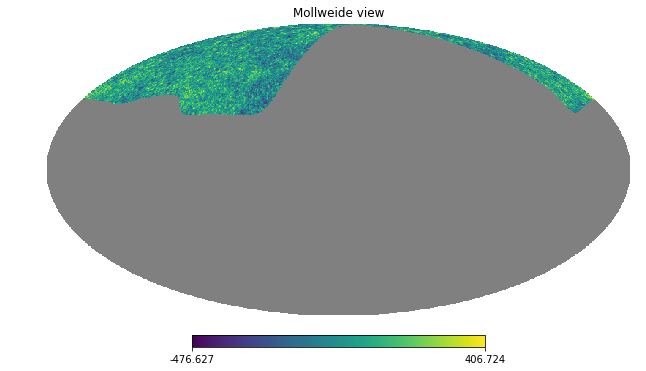

In [541]:
hp.mollview(Mask(cmb[0]))

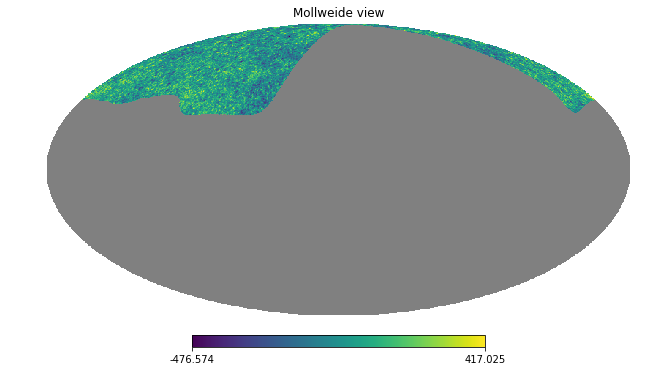

In [540]:
hp.mollview(Mask(cmb_Q))

# Mask

In [564]:
mask_none = np.arange(hp.nside2npix(nside))
l_deg_max = 80; l_deg_min = 100  
my_mask = (np.radians(l_deg_max) < hp.pix2ang(nside, mask_none)[0] ) + (hp.pix2ang(nside, mask_none)[0] < np.radians(l_deg_min))# + cm.make_lat_mask(-15,15,nside)

In [568]:
(np.radians(l_deg_max) < hp.pix2ang(nside, mask_none)[0])

array([False, False, False, ...,  True,  True,  True])

In [570]:
hp.pix2ang?

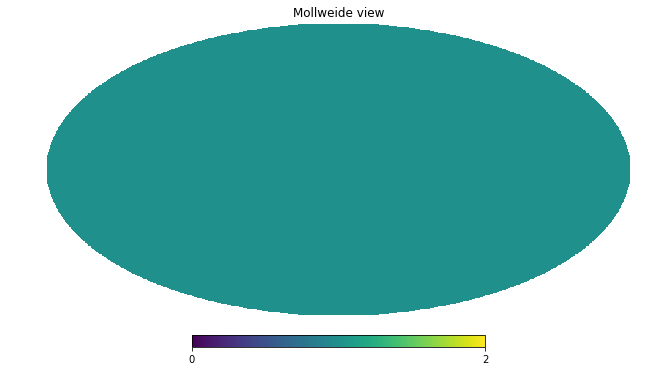

In [565]:
hp.mollview(my_mask)

In [556]:
mask_none

array([       0,        1,        2, ..., 12582909, 12582910, 12582911])

# CAMB CMB cls

In [39]:
pars = camb.CAMBparams(); pars.WantTensors = True
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.26, ombh2=0.022, omch2=0.1199, mnu=0.06, omk=0, tau=0.078)
pars.InitPower.set_params(As=2.19856*1e-9, ns=0.9652, r=0.05)
pars.set_for_lmax(2500, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK', raw_cl=True)

In [31]:
1.881*1e-9/np.e**(-2*0.078)

2.1985620880120438e-09

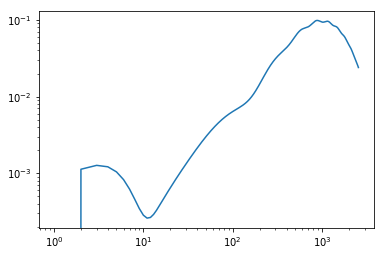

In [40]:
total = np.transpose(powers['total'])
lmax = 2550
ell = np.arange(lmax + 1)
plt.loglog(ell, (ell*(ell+1))/2/np.pi*total[2])

In [41]:
np.savetxt('./cls_r_0p05.txt', total)

In [136]:
cmb_maps = hp.synfast(total, nside = 1024, new = True)
hp.write_map('/smc/jianyao/Ali_maps/cmb_maps_camb.fits', cmb_maps)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


# pysm simulation 

In [169]:
# #

nu = np.array([100, 150, 353]);nside = 1024;
coefficients = convert_units("uK_RJ", "uK_CMB", nu)

def convert_unit(map):
    Nf = len(nu)
    for i in range(0,Nf):
        map[i] = map[i]*coefficients[i]
    return map

sky_config = {'dust':models('d1', nside)}
sky = pysm.Sky(sky_config)

dust_pysm = convert_unit(sky.signal()(nu))

# uK_CMB

15008.372537735582

# Ali noise and mask

In [11]:
# calculate the f_sky 
noise_ali = hp.read_map('/smc/jianyao/Ali_maps/noise_realizations1.fits', h = True)
n = (noise_ali[0]*0 + 1)
f_sky = len(n[n==1])/(12.0*nside**2)
# # nl_ful 

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [12]:
f_sky

1.0

In [99]:
### To generate the Ali_observational mask, and mask out the edge parts (I > 5 uK_CMB ) which have large errors.
n2test = hp.read_map('/smc/jianyao/Ali_maps/Noise_maps/fits/I_Noise_95_G_1024.fits', partial=True)
n2zeros = n2test*0
n2 = np.zeros_like(n2test);
index = np.arange(len(n2test))
n2[n2test <= 5] = 1
# ali_mask = hp.write_map('/smc/jianyao/Ali_maps/ali_mask_wo_edge.fits', n2)

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/jianyao/anaconda3/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/jianyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less_equal
  


In [100]:
## To generate one realization of noise maps. 

n3test = hp.read_map('/smc/jianyao/Ali_maps/Noise_maps/fits/I_Noise_150_G_1024.fits', partial=True)
nIQU = np.zeros((3, len(n3test)))
index = np.arange(len(n2test))#index[n2zeros == 0]
for i in index[n2test <= 5]:
    nIQU[0][i] = np.random.normal(0, n3test[i])
    nIQU[1][i] = np.random.normal(0, n3test[i]*np.sqrt(2))
    nIQU[2][i] = np.random.normal(0, n3test[i]*np.sqrt(2))

# hp.write_map('/smc/jianyao/Ali_maps/noise_realizations_150.fits', nIQU)

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/jianyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less_equal
  


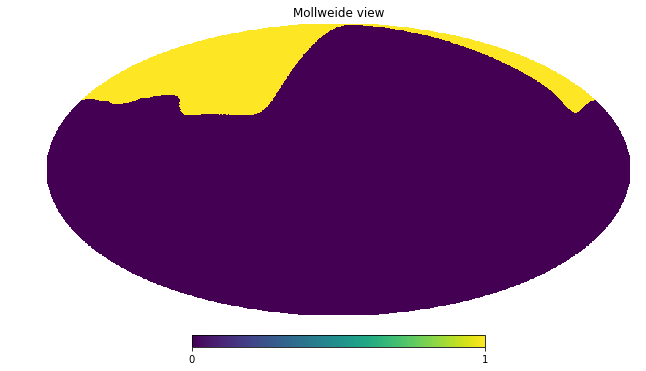

In [107]:
hp.mollview(ali_ma)

In [119]:
noise_ali = hp.read_map('/smc/jianyao/Ali_maps/noise_realizations1.fits',field = None, verbose=False)
noise_ali_ma = Mask(noise_ali)
f_sky = np.sum(ali_ma)/(12*nside**2) # f_sky = 0.1120
nl_full = hp.anafast(noise_ali_ma)/f_sky;
wn = hp.synfast(nl_full, nside = nside, new = True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [120]:
f_sky

0.1120460828145345

In [121]:
hp.write_map('/smc/jianyao/Ali_maps/white_noise_realization_95.fits', wn)